In [ ]:
!pip install pandas
# Usage: Handles data manipulation and analysis
!pip install numpy
# Usage: Provides support for large, multi-dimensional arrays
!pip install keras
# Usage: Simplifies building and training deep learning models. Works as an API wrapper around TensorFlow.
!pip install tensorflow
# Usage: Backend engine for deep learning, powering Keras
!pip install matplotlib
# Usage: Data visualization library for plotting
!pip install opencv-python
# Usage: Computer vision library for image and video processing.
!pip install pillow
# Usage: Image processing library.
!pip install ipython
# Usage: supports rich display and embedding images in Jupyter Notebooks.


In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

from tensorflow.keras import backend as K

from keras.models import model_from_json

In [10]:
df_train=pd.read_csv(r"C:\Users\Abhishek\Downloads\Handwritten_dataset.csv", index_col = False)
# r is used before path to prevent compiler from considering backslashes ( / ) as escape characters , treated as raw string

df_train.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
24967,0,218,0,0,0,0,0,0,0,0,...,0,0,0,0,0,77,178,152,0,4
13826,0,0,0,0,0,0,0,0,0,0,...,198,255,23,0,0,0,0,0,0,1
15220,0,0,0,0,0,0,0,0,0,0,...,0,40,0,0,0,0,0,0,0,1
16208,0,46,77,115,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,2
9752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
24760,0,82,118,0,0,0,0,0,0,0,...,0,0,0,64,171,0,0,0,0,4
2127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
24153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
11740,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0


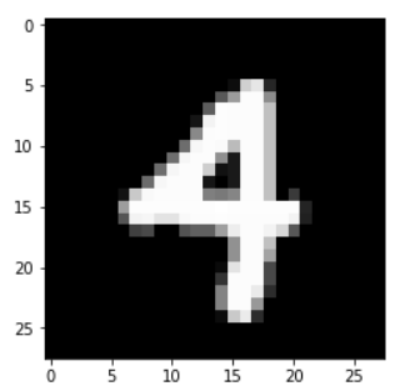

flattened 28x28 grayscale image has 784 pixel values

In [11]:
labels = df_train[['784']]
labels.sample(10)

,784
6959,11
1094,10
37020,7
46039,12
21037,3
1822,10
34604,7
3213,10
38120,8
47427,12


the last column (column 784) has target variable/output class 

each row contains pixel intensity values representing the image, but the last column often contains the class label (digit corresponding to tht img)

In [12]:
df_train = df_train.drop(df_train.columns[[784]], axis = 1)

# labels(output) are used as ground truth to calculate loss and optimize the model
# therefore its removed from the training data being passed to the model

df_train.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
27224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15658,0,0,0,64,191,236,197,133,44,0,...,0,0,0,0,0,0,0,0,0,0
16430,77,77,167,178,178,178,77,77,77,77,...,0,0,0,0,0,0,0,0,0,0


It ensures that the model learns only from the input data (features) and not from the labels.



Prevents data leakage, where the model might improperly "cheat" by using the labels directly.

In [13]:
np.random.seed(1212)
# seed operation ensures reproducibility of random operations

K.set_image_data_format('channels_first')

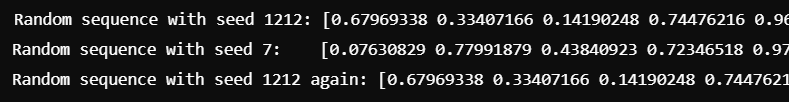

images are stored as multidimensional array [tensor]


A grayscale image with dimensions 28x28 would be represented as (1, 28, 28) 
(1 channel)


A colored image (RGB) with dimensions 64x64 would be represented as (3, 64, 64) 
(3 channels for Red, Green, Blue).

In [14]:
labels = np.array(labels)
cat = to_categorical(labels, num_classes = 13)

Converts labels to a NumPy array and then to one-hot encoded format (cat), with 13 classes.


Reshapes each row in df_train into an image format of (1, 28, 28) (1 channel, 28x28 pixels)

In [15]:
l = []

for i in range(47504):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [16]:
np.random.seed(7)

model.add() function in Keras is used to sequentially add layers to the model. It constructs the architecture of a neural network by stacking one layer at a time.

activation function is used in hidden layers to introduce non-linearity into the model covering more complex pattern Without non-linearity, the model would effectively be a simple linear model 

but the final output layer uses softmax to converts raw scores (logits) into probabilities.
It ensures that the output values sum up to 1, making it ideal for multi-class classification tasks.

In [17]:
model = Sequential()
model.add(Conv2D(30, (5,5), activation = 'relu', input_shape = (1,28,28)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(15, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(13, activation = 'softmax'))

# Compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

c:\Users\Abhishek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 24, 24)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 12, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 10, 10)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 5, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 5, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        48,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │           663 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,086 (234.71 KB)

 Trainable params: 60,086 (234.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(np.array(l), cat, epochs = 15, batch_size = 200, shuffle = True, verbose = 1)


Epoch 1/15
238/238 ━━━━━━━━━━━━━━━━━━━━ 221s 917ms/step - accuracy: 0.4194 - loss: 2.7947
Epoch 2/15
 23/238 ━━━━━━━━━━━━━━━━━━━━ 18:08 5s/step - accuracy: 0.8793 - loss: 0.3807

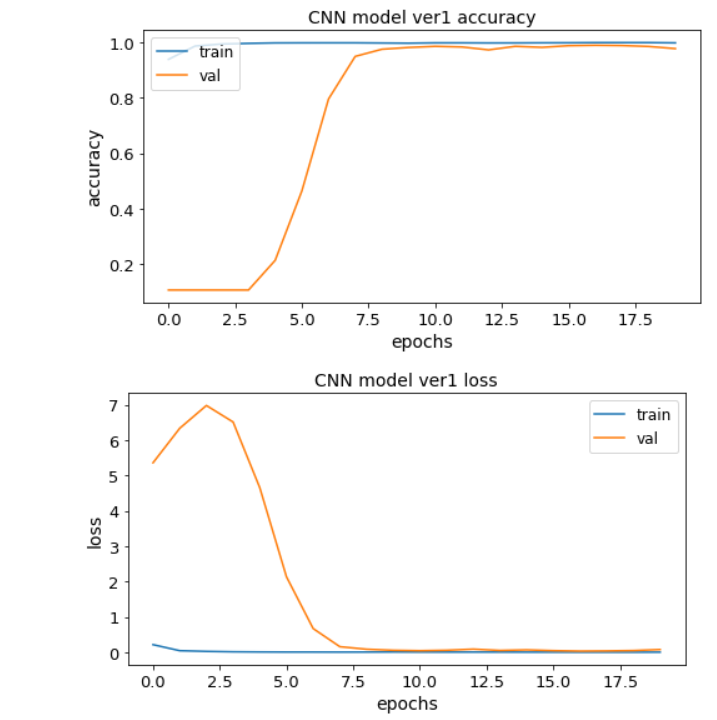

In [15]:
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.weights.h5")

# saves the model's trained weights to .h5 file format and 
# model architechture to json file format